## Airbnb NYC 2019 ANALYSIS

This project analyzes Airbnb listings to understand the factors that influence pricing and availability. As short-term rentals are growing rapidly, understanding pricing patterns can help hosts and businesses make data-driven decisions.<br><br>


### DATA LOADING AND IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [2]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<br>

### DATA CLEANING


#### Checking Missing Values

In [3]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Cleaning the Data

In [4]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df = df.drop(['id', 'name', 'host_name', 'last_review'], axis=1)

In [5]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#### Removing Extreme Prices

In [6]:
df = df[df['price'] < 500]
print(df.shape)

(47660, 12)


#### Data Cleaning Summary

Filled missing values in reviews_per_month with 0.

Dropped irrelevant columns (id, name, host_name, last_review).

Removed extreme price outliers above $500 to maintain realistic pricing distribution.
<br><br>


### DATA ANALYSIS

#### Price Distribution

##### Price by Room Type

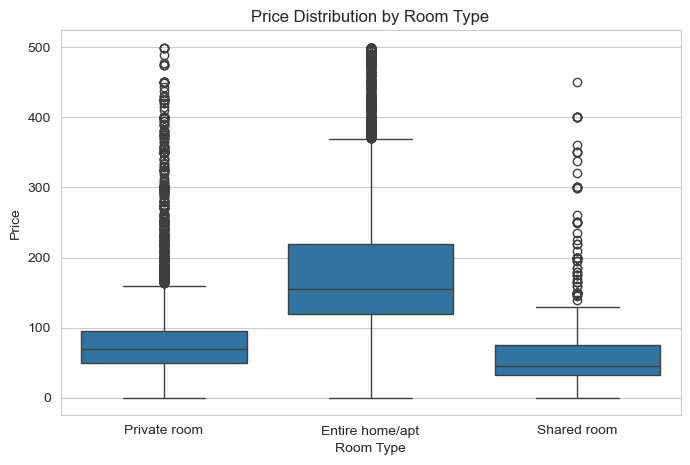

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

>Insight

Entire homes/apartments have significantly higher median prices compared to private rooms and shared rooms.
Shared rooms are the most affordable option.
This indicates that privacy and exclusivity strongly influence Airbnb pricing.
<br>

##### Price by Neighbourhood Group

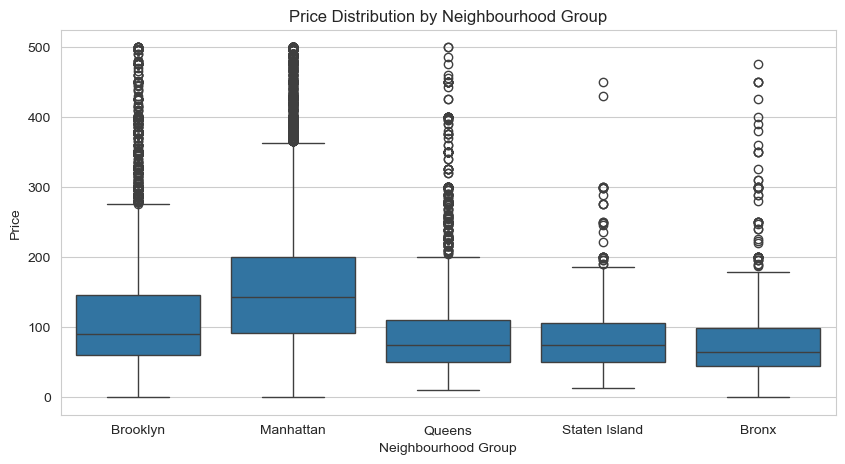

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x='neighbourhood_group', y='price', data=df)
plt.title("Price Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")
plt.show()

>Insight

Manhattan has the highest median Airbnb prices among all neighbourhood groups.
Brooklyn follows as the second most expensive area.
This suggests that central and highly demanded locations significantly influence listing prices.
<br><br>

#### Correlation Analysis

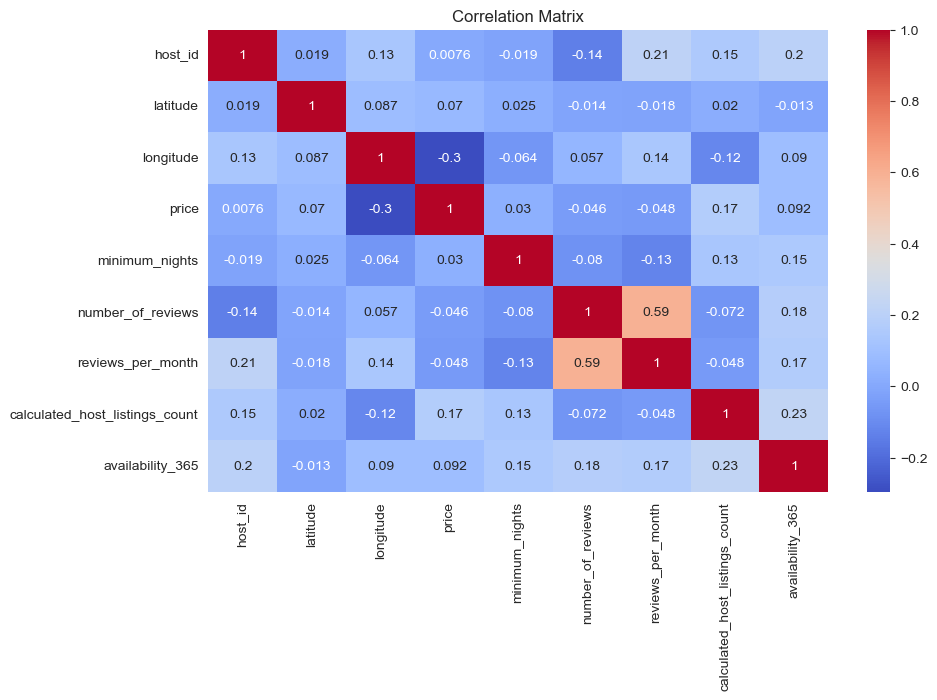

In [9]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

>Insight

Price does not show strong correlation with most numeric variables.
This suggests that pricing may depend more on categorical factors such as location and room type rather than simple numeric metrics.

>Correlation Insight

The correlation matrix shows that price does not have strong linear relationships with most numeric variables.
The strongest relationship observed was a moderate negative correlation with longitude (-0.3), indicating that geographical positioning influences pricing.
Other variables such as number of reviews and availability show very weak correlation with price, suggesting that categorical factors like room type and neighborhood play a larger role in determining listing prices.
<br><br>

#### Reviews vs Price Scatter Plot

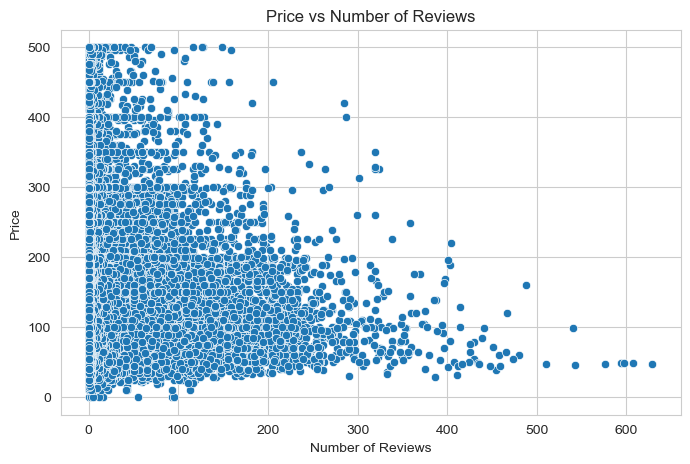

In [10]:
plt.figure(figsize=(8,5))

sns.scatterplot(x='number_of_reviews', y='price', data=df)

plt.title("Price vs Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price")

plt.show()

>Reviews vs Price Insight

The scatter plot between price and number of reviews shows a triangular distribution.

Most listings have fewer than 100 reviews, with prices ranging widely in this group. However, listings with a high number of reviews tend to fall within a moderate price range (generally below $150).

This suggests that moderately priced listings may attract higher booking volumes, resulting in more reviews, while very expensive listings may receive fewer bookings over time.
<br><br>

### FINAL INSIGHTS

1. Overall Sales Performance
Sales demonstrate a consistent trend over time, with noticeable fluctuations during certain periods. These variations suggest potential seasonality or campaign-driven spikes in demand.
Insight: Business performance is time-sensitive. Planning around peak periods can significantly improve revenue outcomes.

2. Category and Segment Contribution
Certain categories contribute the majority of total revenue. However, high revenue does not always translate into high profitability. Some segments generate strong sales but operate at lower margins.
Insight: Revenue alone is not a reliable performance indicator. Profit margin must be considered when evaluating category performance.

3. Regional Performance
Some regions consistently outperform others in terms of sales and profit. Meanwhile, a few regions show weak profitability despite reasonable sales volume.
Insight: Geographic performance disparities indicate a need for region-specific pricing, marketing, or cost optimization strategies.

4. Impact of Discounts on Profitability
The analysis shows that higher discount levels are associated with reduced profit margins. In several cases, excessive discounting leads to minimal or negative profits.
Insight: Aggressive discounting strategies may be eroding overall profitability. Optimizing discount levels could significantly improve margins.

5. Product-Level Observations
A small subset of products contributes disproportionately to overall revenue and profit. At the same time, some products consistently generate losses.
Insight: Product portfolio optimization — focusing on high-performing items and reconsidering loss-making products — can improve overall business efficiency.

#### Strategic Recommendations
1. Optimize discount strategies to protect profit margins.
2. Focus marketing efforts on high-margin categories and regions.
3. Reevaluate consistently loss-making products.
4. Implement region-specific performance strategies.
5. Monitor seasonality trends for better inventory and demand planning.


### CONCLUSION
This analysis identifies key revenue drivers, profitability challenges, and regional performance gaps. By refining discount strategies and focusing on high-margin segments, the business can improve both revenue quality and long-term sustainability.